In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split

%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False  #minus가 깨져서 검색하여 코드 추가함

y = ax + b

MSE(a,b) = 0 >> 평균 제곱 오차가 0이 되는 a와 b 찾기

In [9]:
# 최소제곱법

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]


def top(x, mx, y, my):
        d=0
        for i in range(len(x)):
            d += (x[i]-mx)*(y[i]-my)
        return d

def getAns(x, y):
    mx = np.mean(x)
    my = np.mean(y)
    print("x 평균:",mx,", y 평균:",my)
    
    divisor = sum(pow((mx-i),2) for i in x)
    dividend = top(x,mx,y,my)
    print("분모 : ", divisor, ", 분자 : ",dividend)

    a = dividend / divisor
    b = my - mx*a
    print("기울기 a = {:.5f}".format(a), ", y절편 = {:.5f}".format(b))
    return

print("x, y")
getAns(x,y)



x, y
x 평균: 5.0 , y 평균: 90.5
분모 :  20.0 , 분자 :  46.0
기울기 a = 2.30000 , y절편 = 79.00000


root mean squre error

- 임의의 선을 그리고 오차를 계산 > 오차가 작아지는 쪽으로 알고리즘 수정
- MSE의 제곱근(=RMSE)

- sqrt ( ∑((predict) - (answer))^2 / n )

In [10]:
ab = [[3,76], [4, 85],[2,60]] # y =  ax+b

data = [[2,81],[4,93],[6,91],[8,97]]

x = [ i[0] for i in data ]
y = [ i[1] for i in data ]

def predict(x, i):
    return ab[i][0]*x + ab[i][1]

def rmse(p,a):
    return np.sqrt(((p-a)**2).mean())

def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))


for abs in range(len(ab)):
    print('y = %.dx + %.d' % (ab[abs][0], ab[abs][1]))
    predict_result = []
    for i in range(len(x)):
        predict_result.append(predict(x[i], abs))
        print("공부한 시간 = %.f 실제 점수 = %.f, 예측 점수 = %.f" % (x[i], y[i], predict(x[i], abs)))
    print("rmse 최종값 : ", str(rmse_val(predict_result, y)))
    print("\n")

#x = [ i[0] for i in data ] ...
#i에 [a,b] .. [a,b][0] = a .. 이렇게 추출
#Array = > array끼리 바로 연산 가능!
#mean() => 배열을 넘기면 알아서 평균 구함

y = 3x + 76
공부한 시간 = 2 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8 실제 점수 = 97, 예측 점수 = 100
rmse 최종값 :  3.3166247903554


y = 4x + 85
공부한 시간 = 2 실제 점수 = 81, 예측 점수 = 93
공부한 시간 = 4 실제 점수 = 93, 예측 점수 = 101
공부한 시간 = 6 실제 점수 = 91, 예측 점수 = 109
공부한 시간 = 8 실제 점수 = 97, 예측 점수 = 117
rmse 최종값 :  15.264337522473747


y = 2x + 60
공부한 시간 = 2 실제 점수 = 81, 예측 점수 = 64
공부한 시간 = 4 실제 점수 = 93, 예측 점수 = 68
공부한 시간 = 6 실제 점수 = 91, 예측 점수 = 72
공부한 시간 = 8 실제 점수 = 97, 예측 점수 = 76
rmse 최종값 :  20.71231517720798




- RMSE의 최종값을 보면 3x+76 < 4x + 85로 3x+76 기울기가 더 오차가 적다
- 예측 점수를 보면 실제 점수에 더 가까운 예측값을 가진다

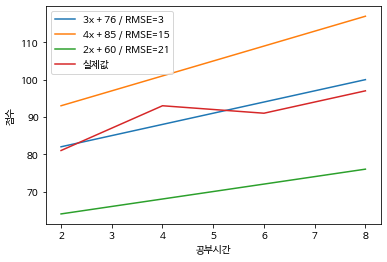

In [11]:
predict_list = []
for abs in range(len(ab)):
    predict_result = []
    for i in range(len(x)):
        predict_result.append(predict(x[i], abs))
    predict_list.append(predict_result)

colors = []
for i in range(len(predict_list)):
    plt.plot(x, predict_list[i], label='%.dx + %.d / RMSE=%.f' % (ab[i][0], ab[i][1], rmse_val(predict_list[i], y)))
    
plt.plot(x, y, label='실제값')
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.legend()

RMSE가 가장 적은 함수가 실제값과 가장 근사한 것을 확인

#### 경사하강법 Gradient Descending

- y = Wx + b
- 임의의 가중치 w를 선택
- 미분값으로 직선의 기울기를 구하고 미분값이 작아지는 방향으로 w를 감소/증가
- 평균 제곱 오차 ㅡ MSE 가 최소가 되는 w, b >> 이차원함수
- w := w - α(∂/∂w)MSE    ㅡㅡㅡ  알파는 학습률(Learning Rate)
- b := b - α(∂/∂b)MSE



Const Function / Optimizer
>Cost Function
>- 실제값과 예측값의 차이
>- 잔차, 잔차의 합, 잔차의 제곱합

>Optimizer
>- 비용함수의 최소값을 찾는 알고리즘
>- 경사하강법으로..
>- 미분해서 cost가 0가 되는 지점

#### 경사 하강법으로 위의 공부 시간과 시험 점수에 대한 W, b구하기

- 블로그 참고 ..

> https://teddylee777.github.io/scikit-learn/gradient-descent
> https://chancoding.tistory.com/81

In [12]:
#데이터
data = [[2,81],[4,93],[6,91],[8,97]]

x = [ i[0] for i in data ]
y = [ i[1] for i in data ]
print('x=',x)
print('y=',y)


#임의의 직선 정의 y = Wx + b
W = np.random.rand() 
b = np.random.rand()
print('y = %.5fx +%.5f '% (W, b))

#학습률
learning_rate = 0.01

errors = []
steps = []


#MSE(W,b) 구하는 함수
def mse(y_hat):
    return ((y_hat-y)**2).mean()

y = np.array(y) 
y_hat = np.add(np.dot(x,W),b)
print('초기 MSE : ',((y_hat-y)*x).mean() *learning_rate)

print('')
for step in range(8000):
    y_hat = np.add(np.dot(x,W),b)
    W -= learning_rate * ((y_hat - y)*x).mean()  
    b -= learning_rate * (y_hat - y).mean()         
    
    if(step%400 == 0):
        print("{0:5} w = {1:.5f}, b = {3:.5f} error = {3:.5f}".format(step, W, b, mse(y_hat)))
        steps.append(step)
        errors.append(mse(y_hat))
print(y)
print(y_hat)

print('y = %.5fx +%.5f '% (W, b))


x= [2, 4, 6, 8]
y= [81, 93, 91, 97]
y = 0.31047x +0.05907 
초기 MSE :  -4.543905191479976

    0 w = 4.85438, b = 7929.26983 error = 7929.26983
  400 w = 8.98410, b = 274.37467 error = 274.37467
  800 w = 5.79262, b = 80.94739 error = 80.94739
 1200 w = 4.12499, b = 28.13520 error = 28.13520
 1600 w = 3.25360, b = 13.71568 error = 13.71568
 2000 w = 2.79828, b = 9.77866 error = 9.77866
 2400 w = 2.56037, b = 8.70373 error = 8.70373
 2800 w = 2.43605, b = 8.41023 error = 8.41023
 3200 w = 2.37109, b = 8.33010 error = 8.33010
 3600 w = 2.33715, b = 8.30822 error = 8.30822
 4000 w = 2.31941, b = 8.30224 error = 8.30224
 4400 w = 2.31014, b = 8.30061 error = 8.30061
 4800 w = 2.30530, b = 8.30017 error = 8.30017
 5200 w = 2.30277, b = 8.30005 error = 8.30005
 5600 w = 2.30145, b = 8.30001 error = 8.30001
 6000 w = 2.30076, b = 8.30000 error = 8.30000
 6400 w = 2.30040, b = 8.30000 error = 8.30000
 6800 w = 2.30021, b = 8.30000 error = 8.30000
 7200 w = 2.30011, b = 8.30000 error = 8.30000
 7

최소제곱법으로 구한 기울기와 절편
- 기울기 = 2.30 , y절편 = 79.00

경사 하강법으로 구한 기울기와 절편
- 기울기 =  2.30003, y절편 = 78.9998..

y = 2.30003x +78.99982 


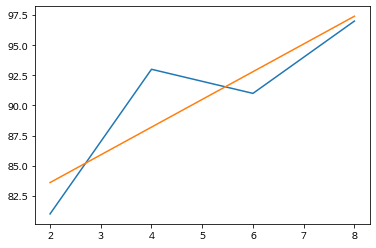

In [13]:
plt.plot(x,y, label='원본')
plt.plot(x,np.add(np.dot(x,W),b), label='모델')

print('y = %.5fx +%.5f '% (W, b))

Text(0, 0.5, 'Error')

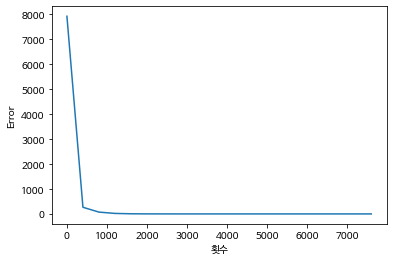

In [14]:
plt.plot(steps,errors)
plt.xlabel('횟수')
plt.ylabel('Error')

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66
lr.coef_:  [0.39390555]
lr.intercept_: -0.031804343026759746


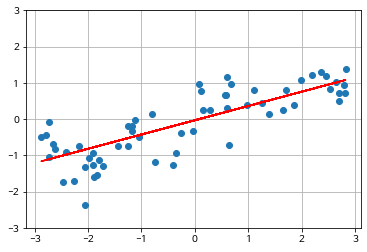

In [15]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 훈련 세트 점수가 너무 안 나옴.. > 과소 적합

print("lr.coef_: ", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# coef 계수, intercept 절편
predict = lr.predict(X)

plt.plot(X,y,'o')
plt.plot(X, predict, color='red')
plt.ylim(-3,3)
plt.grid() #격자

#y= -0.0393906x - 0.031804...
#특성이 1개 = 직선, 2개 = 평면, n개 = 초평면

훈련 세트 점수: 0.65
테스트 세트 점수: 0.77
w[0] :  [0.47954524]  b:  -0.09847983994403892
훈련 세트 점수: 0.59
테스트 세트 점수: 0.66
w[0] :  [0.40443939]  b:  -0.022568028173365354
훈련 세트 점수: 0.68
테스트 세트 점수: 0.57
w[0] :  [0.48215751]  b:  0.04154708498957077


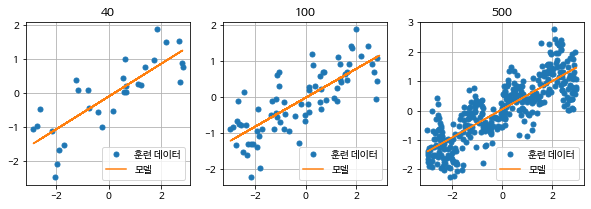

In [16]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for samples, ax in zip([40,100,500], axes):
    X,y = mglearn.datasets.make_wave(n_samples = samples)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    lr = LinearRegression().fit(X_train, y_train)
    print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
    print("w[0] : ", lr.coef_, " b: ", lr.intercept_)
    ax.plot(X_train, y_train, 'o', markersize=5)
    ax.plot(X, lr.predict(X))
    ax.grid()
    ax.set_title(samples)
    ax.legend(["훈련 데이터", "모델"], loc=4)
   
    
#데이터가 많아질수록 세트 점수가 떨어짐..

Linear Regression
훈련 세트 점수: 0.68
테스트 세트 점수: 0.57
w[0] :  [0.48215751]  b:  0.04154708498957077

KNN Regression
훈련 세트 점수: 0.82
테스트 세트 점수: 0.63


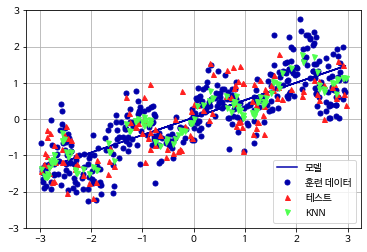

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples = 500)
#sample 500 데이터

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
lr = LinearRegression().fit(X_train, y_train) 
#Linear Regression
knn = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)
#KNN Regresion

print("Linear Regression")
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
print("w[0] : ", lr.coef_, " b: ", lr.intercept_)

print("\nKNN Regression")
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

plt.plot(X, lr.predict(X), c=mglearn.cm3(0))
plt.plot(X_train, y_train, 'o', markersize=5, c=mglearn.cm3(0))
plt.plot(X_test, y_test, '^', markersize=5,  c=mglearn.cm3(1))
plt.plot(X_test, knn.predict(X_test), 'v',markersize=5,  c=mglearn.cm3(2))

plt.ylim(-3,3)

plt.grid()
plt.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc=4)

#선형보다 knn이 좀 더 점수가 높음

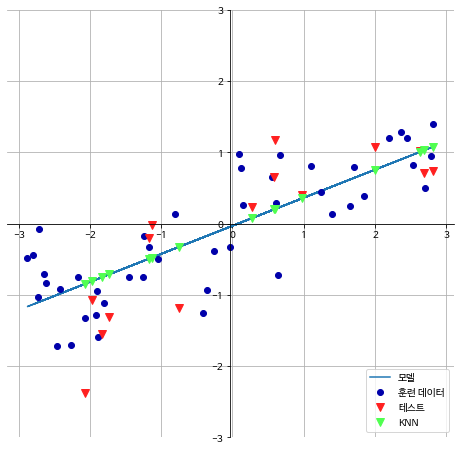

In [18]:
X,y = mglearn.datasets.make_wave(n_samples = 60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train) 

plt.figure(figsize=(8,8))
plt.plot(X_train, lr.predict(X_train))
plt.plot(X_train, y_train, 'o', c=mglearn.cm3(0))
plt.plot(X_test, y_test,'v',c=mglearn.cm3(1), markersize=8)
plt.plot(X_test, lr.predict(X_test),'v',c=mglearn.cm3(2), markersize=8)

ax=plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3,3)
ax.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc=4)
ax.grid()
ax.set_aspect('equal')

# plt.gca ?  현재 figure를 반환
# spines - 테두리. 축 
# left와 bottom를 중심으로 옮겨서 크로스된 형태를 만들고 나머지를 안보이게. 
# set_aspect / x,y축 배율 설정  'auto', 'equal', num 가능

In [19]:
#보스톤 주택 가격

from sklearn.datasets import load_boston

boston = load_boston()
print("boston.keys():\n", boston.keys())
print("boston 데이터의 형태 : ", boston.data.shape)
print(boston['DESCR'] + "\n...")
print("특성 이름:\n" , boston.feature_names)

df = pd.DataFrame(boston.data, columns=boston.feature_names)
display(df.head())

boston.keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
boston 데이터의 형태 :  (506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of ac

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


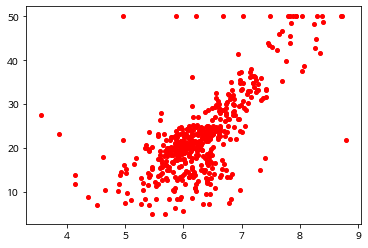

In [20]:
plt.plot(boston.data[:,5], boston.target, 'o', color='r', markersize=4)

#RM ㅡ방의 개수와 주택 가격 사이의 관계
#plt.scatter(boston.data[:,5], boston.target, color='r', s=10)

In [21]:
#속성 하나로 선형회귀 실험

X= boston.data[:,5] #RM속성
print(X.shape)

X_1 = np.atleast_2d(X)  #X를 2차원 배열 (1, n)형태로
print(X_1.shape)
X_2 = np.transpose(X_1) # (1,n) -> (n, 1)로

print(X_2.shape)
print(X_2[:5])
y= boston.target #타깃 데이터

lr.fit(X_2, y)
y_predicted = lr.predict(X_2)

print("w[0]: %f  b: %f" % (lr.coef_, lr.intercept_))


(506,)
(1, 506)
(506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
w[0]: 9.102109  b: -34.670621


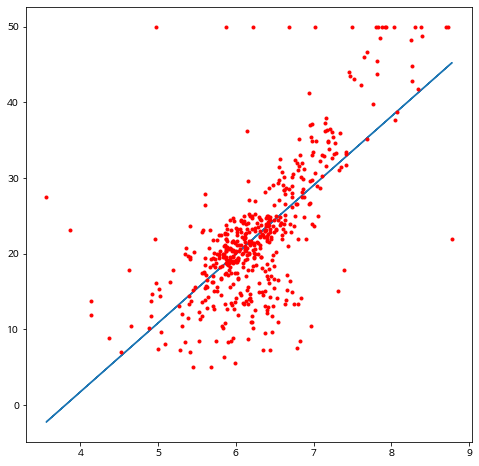

In [22]:
plt.figure(figsize=(8,8))
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='r', markersize=3)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape:{}".format(X_train.shape))

lr = LinearRegression().fit(X_train, y_train) 

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.shape:(379, 13)
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


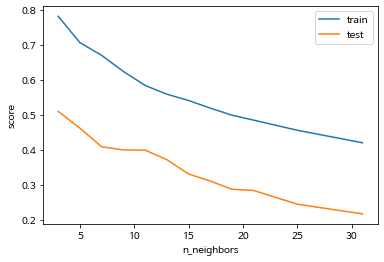

In [24]:
ks = [3,5,7,9,11,13,15,17,19,21,25,31]

score=[]

for i in ks:
    knn = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    score.append([knn.score(X_train, y_train),knn.score(X_test, y_test)])

score = np.array(score)

plt.plot(ks, score[:,0], label='train')
plt.plot(ks, score[:,1], label = 'test')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()



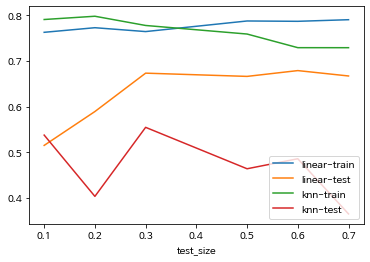

In [25]:
size = [0.1,0.2,0.3,0.5,0.6,0.7]
score_linear =[]
score_knn=[]

knn = KNeighborsRegressor(n_neighbors=3)

for i in size:
    X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0, test_size=i)
    lr.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    score_linear.append([lr.score(X_train, y_train), lr.score(X_test, y_test)])
    score_knn.append([knn.score(X_train, y_train), knn.score(X_test, y_test)])

score_linear = np.array(score_linear)
score_knn = np.array(score_knn)
size = np.array(size)

plt.plot(size, score_linear[:,0], label='linear-train')
plt.plot(size, score_linear[:,1], label='linear-test')
plt.plot(size, score_knn[:,0], label='knn-train')
plt.plot(size, score_knn[:,1], label='knn-test')
plt.xlabel('test_size')
plt.legend(loc=4)

#확장 ㅡ 보스턴 데이터  // 선형회귀의 경우 테스트 데이터에 관해 
# knn보다 선형이 더 성능이 좋음

In [26]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape:{}".format(X_train.shape))

lr = LinearRegression().fit(X_train, y_train) 
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

#훈련 세트와 테스트 세트의 점수를 비교..
#과대적합

X_train.shape:(379, 104)
훈련 세트 점수: 0.95
테스트 세트 점수: 0.61
훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


(506, 1)


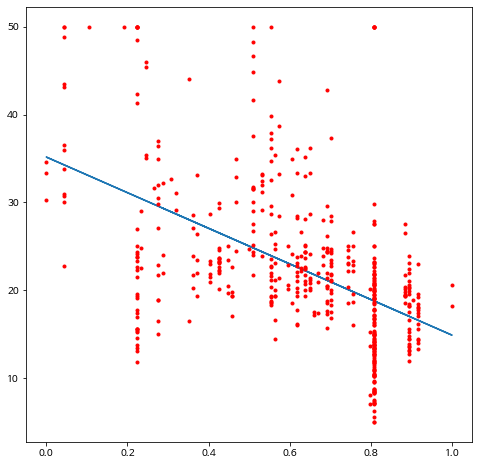

In [27]:
#Linear
X, y = mglearn.datasets.load_extended_boston()

X= X[:,10] # feature 10번째에 대하여
X_1 = np.atleast_2d(X)  #X를 2차원 배열 (1, n)형태로
#X_2 = np.transpose(X_1) # (1,n) -> (n, 1)로
X_2 = X_1.reshape(506,1)       
print(X_2.shape)

lr.fit(X_2, y)
y_predicted = lr.predict(X_2)

plt.figure(figsize=(8,8))
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='r', markersize=3)

#transpose(X_1) = reshape(len(X), 1)  같은 동작

(6, 2)
(6,)
[[ 0.93946809  0.4736305 ]
 [ 0.9490241   0.61588586]
 [ 0.95172468  0.64868395]
 [ 0.96945897  0.66379583]
 [ 0.97728255  0.51619107]
 [ 0.98915441 -0.12498182]]


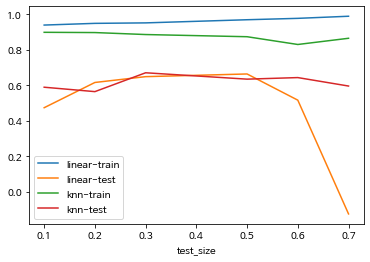

In [28]:
size = [0.1,0.2,0.3,0.5,0.6,0.7]
score_linear =[]
score_knn=[]
X, y = mglearn.datasets.load_extended_boston()

for i in size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=i)
    lr.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    score_linear.append([lr.score(X_train, y_train), lr.score(X_test, y_test)])
    score_knn.append([knn.score(X_train, y_train), knn.score(X_test, y_test)])


score_linear = np.array(score_linear)
score_knn = np.array(score_knn)
size = np.array(size)
print(score_linear.shape)
print(size.shape)

print(score_linear)

plt.plot(size, score_linear[:,0], label='linear-train')
plt.plot(size, score_linear[:,1], label='linear-test')
plt.plot(size, score_knn[:,0], label='knn-train')
plt.plot(size, score_knn[:,1], label='knn-test')
plt.xlabel('test_size')
plt.legend()

#확장 ㅡ 보스턴 데이터  // 선형회귀의 경우 테스트 데이터에 관해 

 test_size 0.7에 대해 linear test가 음수값이 나온다
- 1-((오차제곱의합)/(편차제곱의합))으로 이는 실제 타깃에 대해 타깃 평균보다 예측값의 추측이 차이가 크다는 것을 의미..